### Titanic Data Setinde ;
#### 1.Cinsiyetlere gore yolcu sayisini gormek icin hangi tur grafigi secersiniz?

In [ ]:
Bar Chart

#### 2.Binis limanina gore yolcu yuzdelerini gormek icin hangi grafik turlerini secersiniz?

In [ ]:
Pie Chart yada Donut Chart

#### 3.Yas-cinsiyet grafiginde yas icin outlier lari gormek isterseniz hangi grafik turunu secersiniz?

In [ ]:
Box Plot

#### ----------------------------------------------------------------------------------------------------------------
https://www.kaggle.com/esratepebasi/notebookdac99e35a7

copy and edit yaparak kodlari calistiriniz.

In [1]:
import pandas as pd             # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns           # visualization tool
import matplotlib.pyplot as plt # plotting
import numpy as np              # linear algebra
import os                       # accessing directory structure

In [2]:
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

sns.set(style='darkgrid')
%matplotlib inline

In [3]:
titanic= sns.load_dataset('titanic')
df = titanic.copy()
#df
#df.head()
df.head(3)
#df.tail()
#df.tail(3)
#df.describe()
#

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


#### ----------------------------------------------------------------------------------------------------------------

In [4]:
print("Number of male passengers: ", len(df.groupby('sex').groups['male']))
print('Number of female passengers: ', len(df.groupby('sex').groups['female']))

Number of male passengers:  577
Number of female passengers:  314


In [5]:
male_passenger = df[df['sex']== 'male']
female_passenger = df[df['sex']== 'female']

In [6]:
#Kid passengers' dataframe. I accepted under of 16 years old as kid.
kid_passenger = df[df['age'] < 16]

male_kid_passenger = kid_passenger[kid_passenger['sex'] == 'male']
female_kid_passenger = kid_passenger[kid_passenger['sex'] == 'female']

In [7]:
#Creating adult male and female dataframes by dropping kid passengers
adult_male_passenger = male_passenger.drop(male_kid_passenger.index[:])
adult_female_passenger = female_passenger.drop(female_kid_passenger.index[:])

In [8]:
#Number of passengers according to sex and age
print ('Number of all passengers:', len(df))
print ('Number of male passengers:', len(male_passenger))
print ('Number of female passengers:', len(female_passenger))
print ('Number of adult male passengers:', len(adult_male_passenger))
print ('Number of adult female passengers:', len(adult_female_passenger))
print ('Number of kid passengers:', len(kid_passenger))

Number of all passengers: 891
Number of male passengers: 577
Number of female passengers: 314
Number of adult male passengers: 537
Number of adult female passengers: 271
Number of kid passengers: 83


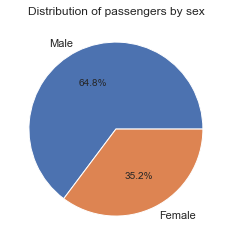

In [9]:
#Visualization of percentages of passengers by sex on pie chart

#GRAFIK 1

x = [len(male_passenger), len(female_passenger)]
label = ['Male', 'Female']
plt.pie(x, labels = label, autopct = '%1.01f%%')
plt.title('Distribution of passengers by sex')
plt.show()

In [10]:
#We can also diversify age groups by defining a function:
def age_distribution(x):
    if x>=0 and x <16:
        return 'Child'
    elif x>=16 and x<=24:
        return 'Young'
    else:
        return 'Adult'
    
df['age'].apply(age_distribution).value_counts()


Adult    614
Young    194
Child     83
Name: age, dtype: int64

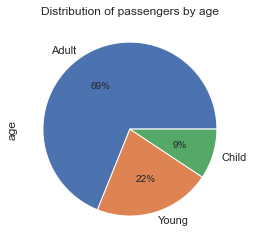

In [11]:
#Visualization of percentages of passengers by age
df['age'].apply(age_distribution).value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Distribution of passengers by age')
plt.show()

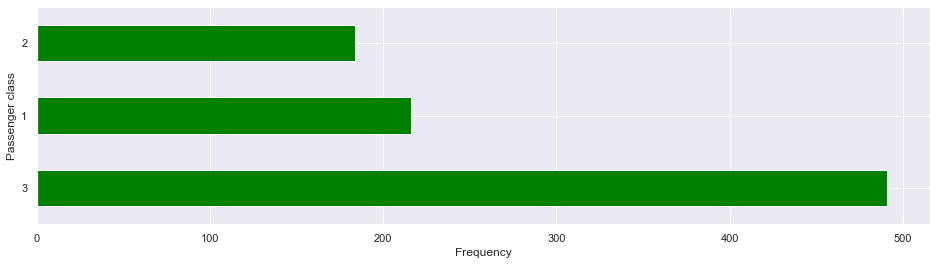

In [12]:
#Yolcu sınıflarına göre yolcu sayılarının dağılımı yatay çubuk grafik ile görselleştirilmiştir.

#GRAFIK_2

df['pclass'].value_counts().plot(kind='barh', color='green', figsize=[16,4])
plt.xlabel('Frequency')
plt.ylabel('Passenger class')
plt.show()

In [13]:
#Filling the two missing values in 'Embarked' with the most occurred value, which is "S"
df['embarked'] = df['embarked'].fillna('S')

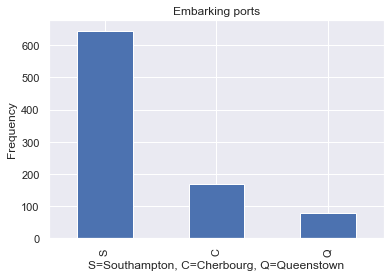

In [14]:
#Visualization of number of passengers by embarking ports 
df['embarked'].value_counts().plot(kind='bar')
plt.title('Embarking ports')
plt.ylabel('Frequency')
plt.xlabel('S=Southampton, C=Cherbourg, Q=Queenstown')
plt.show()

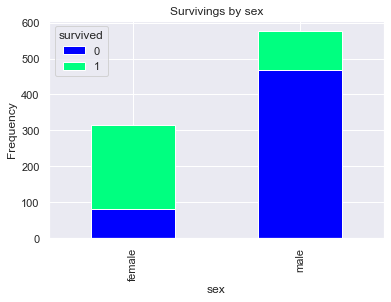

In [15]:
#GRAFIK 3

sex_survived = df.groupby(['sex', 'survived'])
sex_survived.size().unstack().plot(kind='bar', stacked=True, colormap='winter')
plt.ylabel('Frequency')
plt.title('Survivings by sex')
plt.show()

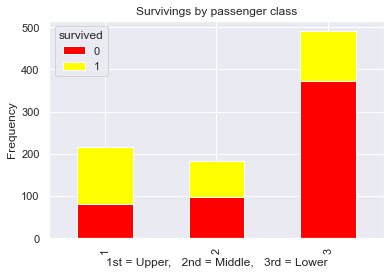

In [16]:
# GRAFIK 4

#Visualization of survivings by passenger class
class_survived = df.groupby(['pclass', 'survived'])
class_survived.size().unstack().plot(kind='bar', stacked=True, colormap='autumn')
plt.xlabel('1st = Upper,   2nd = Middle,   3rd = Lower')
plt.ylabel('Frequency')
plt.title('Survivings by passenger class')
plt.show()

<AxesSubplot:xlabel='sibsp', ylabel='fare'>

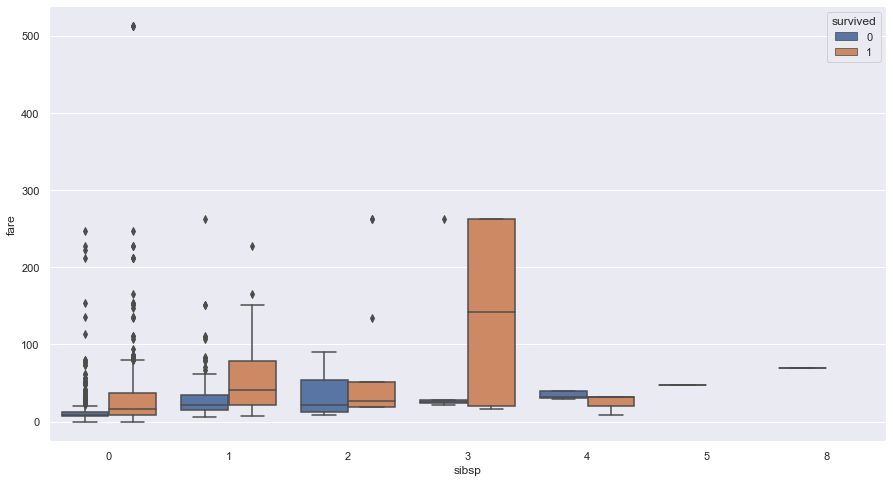

In [17]:
#Grafik 5
plt.figure(figsize=(15,8))
sns.boxplot("sibsp", "fare", hue = "survived", data=df)

<AxesSubplot:>

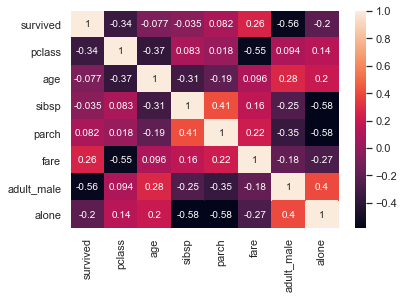

In [18]:
#GRAFIK 6

corr = df.corr()
sns.heatmap(corr, annot=True)

#### 4.Grafik 1 de degisiklikler yaparak sizde farkli pie chart lar deneyiniz. (erkek cocuk-kiz cocuk yolcularin grafigi,vb.)

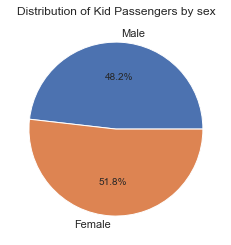

In [19]:
#GRAFIK 1.1

x = [len(male_kid_passenger), len(female_kid_passenger)]
label = ['Male', 'Female']
plt.pie(x, labels = label, autopct = '%1.01f%%')
plt.title('Distribution of Kid Passengers by sex')
plt.show()

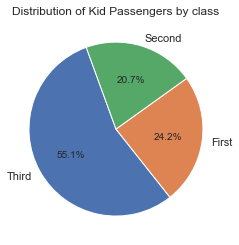

In [20]:
#GRAFIK 1.2
plt.pie(df['class'].value_counts(), labels = df['class'].unique(), autopct = '%1.01f%%',startangle=110)
plt.title('Distribution of Kid Passengers by class')
plt.show()

#### 5.Grafik 2 nin kodlarindan yararlanarak pie chart ile gosterdiginiz grafikleri bar charta donusturunuz.

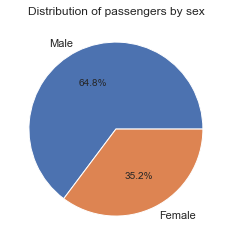

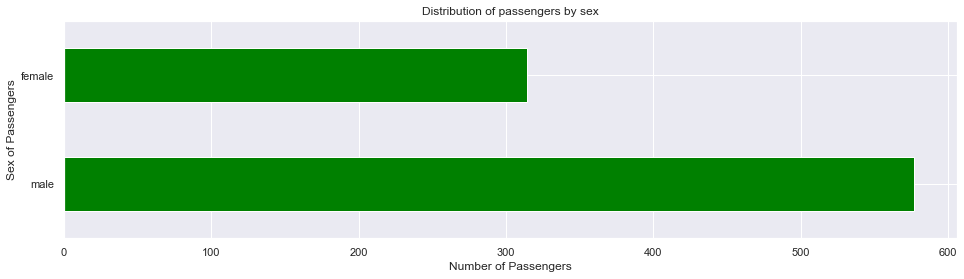

male      577
female    314
Name: sex, dtype: int64

In [21]:
#GRAFIK 1

x = [len(male_passenger), len(female_passenger)]
label = ['Male', 'Female']
plt.pie(x, labels = label, autopct = '%1.01f%%')
plt.title('Distribution of passengers by sex')
plt.show()

#Converting "GRAFIK 1" piechart to barchart

df['sex'].value_counts().plot(kind='barh', color='green', figsize=[16,4])
plt.xlabel('Number of Passengers')
plt.ylabel('Sex of Passengers')
plt.title('Distribution of passengers by sex')
plt.show()


df['sex'].value_counts()

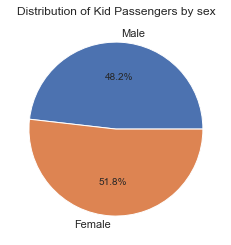

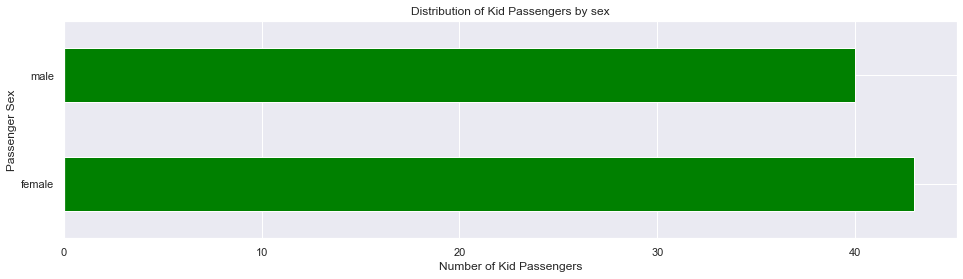

female    43
male      40
Name: sex, dtype: int64

In [23]:
#GRAFIK 1.1

x = [len(male_kid_passenger), len(female_kid_passenger)]
label = ['Male', 'Female']
plt.pie(x, labels = label, autopct = '%1.01f%%')
plt.title('Distribution of Kid Passengers by sex')
plt.show()


#Converting "GRAFIK 1.1" piechart to barchart

kid_passenger['sex'].value_counts().plot(kind='barh', color='green', figsize=[16,4])
plt.xlabel('Number of Kid Passengers')
plt.ylabel('Passenger Sex')
plt.title('Distribution of Kid Passengers by sex')
plt.show()

kid_passenger['sex'].value_counts()

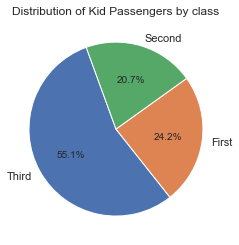

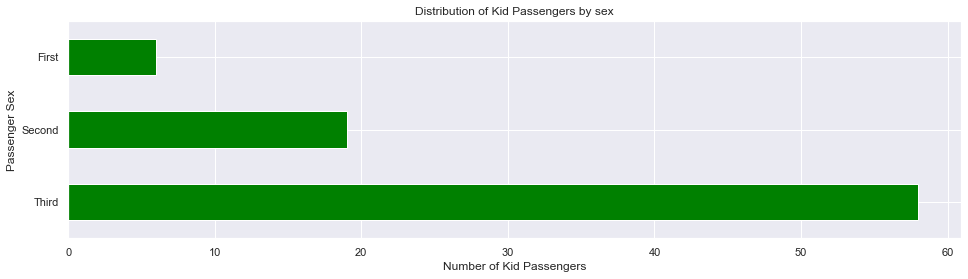

Third     58
Second    19
First      6
Name: class, dtype: int64

In [22]:
#GRAFIK 1.2
plt.pie(df['class'].value_counts(), labels = df['class'].unique(), autopct = '%1.01f%%',startangle=110)
plt.title('Distribution of Kid Passengers by class')
plt.show()

#Converting "GRAFIK 1.2" piechart to barchart

kid_passenger['class'].value_counts().plot(kind='barh', color='green', figsize=[16,4])
plt.xlabel('Number of Kid Passengers')
plt.ylabel('Passenger Sex')
plt.title('Distribution of Kid Passengers by sex')
plt.show()

kid_passenger['class'].value_counts()

#### 6.Grafik 3,4 hangi grafik turune ornektir? Baska hangi titanic datasi degiskenleri icin bu grafik turunu kullanabiliriz,yorum yapiniz.

    Stack Bar Chart
    
    town by passenger class
    town by sex
    tickets by classes

#### 7.Grafik 5 hangi grafik turune ornektir?

In [ ]:
Box Pilot

#### 8.Grafik 6 ya gore ucret ile hayatta kalma arasindaki korelasyon kactir?

<AxesSubplot:>

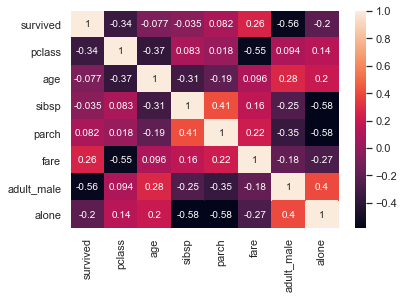

In [48]:
#GRAFIK 6

corr = df.corr()
sns.heatmap(corr, annot=True)

In [ ]:
0.26

In [46]:
np.corrcoef(df.fare, df.survived)[0][1].round(decimals=2)

0.26

In [44]:
df[["survived","fare"]].corr().round(decimals=2)

,survived,fare
survived,1.00,0.26
fare,0.26,1.00
